In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os


In [3]:
os.getcwd()

'C:\\Users\\Moin Kazi\\DATA SCIENTIST\\2. STATS & ML\\2) ML=MOIN NOTES (Sundaram)\\LR\\MOIN'

In [4]:
data=pd.read_csv('50_Startups.csv')

In [5]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
data['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
data.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [9]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
data.isnull().sum()/len(data)*100

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64

<AxesSubplot:>

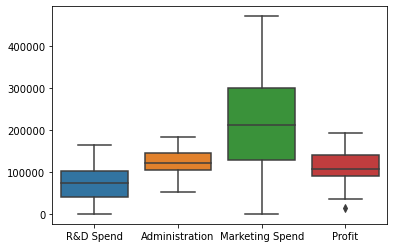

In [11]:
sns.boxplot(data=data)

In [12]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
PO=q3+(1.5*iqr)
NO=q1-(1.5*iqr)

In [13]:
data=data[~((data<NO)|(data>PO)).any(axis=1)]

C:\Users\MOINKA~1\AppData\Local\Temp/ipykernel_2380/3887104574.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data=data[~((data<NO)|(data>PO)).any(axis=1)]


<AxesSubplot:>

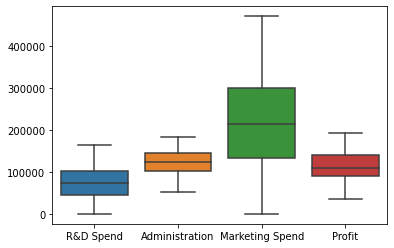

In [14]:
sns.boxplot(data=data)

In [15]:
#dummies 

In [16]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [19]:
data['State'].value_counts()

New York      17
California    16
Florida       16
Name: State, dtype: int64

In [20]:
a=pd.get_dummies(data=data,columns=['State'],drop_first=True)

In [31]:
a.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [27]:
a.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
R&D Spend,1.000000,0.243438,0.711654,0.978437,0.085734,0.015816
Administration,0.243438,1.000000,-0.037280,0.205841,0.008334,0.002858
Marketing Spend,0.711654,-0.037280,1.000000,0.739307,0.191104,-0.055087
Profit,0.978437,0.205841,0.739307,1.000000,0.088008,-0.004679
State_Florida,0.085734,0.008334,0.191104,0.088008,1.000000,-0.507519
State_New York,0.015816,0.002858,-0.055087,-0.004679,-0.507519,1.000000


<AxesSubplot:>

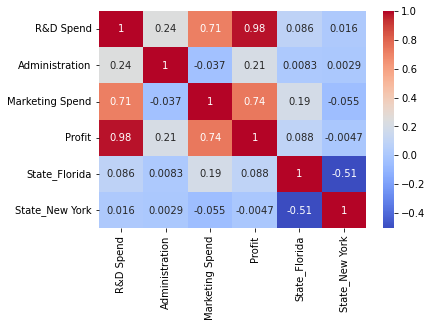

In [30]:
sns.heatmap(a.corr(),annot=True,cmap='coolwarm')

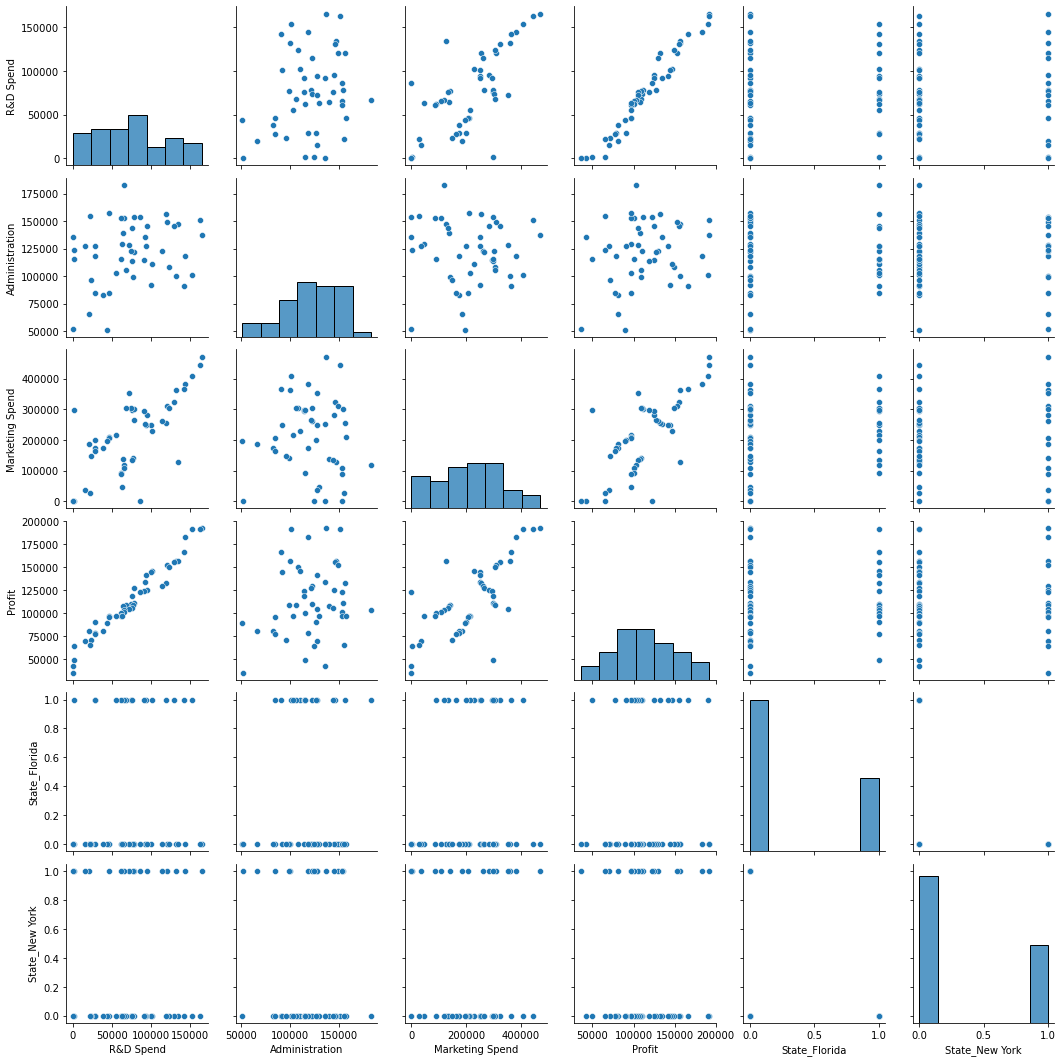

In [43]:
sns.pairplot(a)

C:\Users\Moin Kazi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

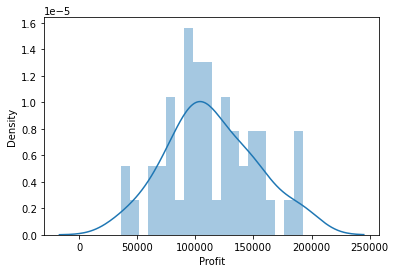

In [48]:
sns.distplot(a['Profit'],bins=20)

C:\Users\Moin Kazi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

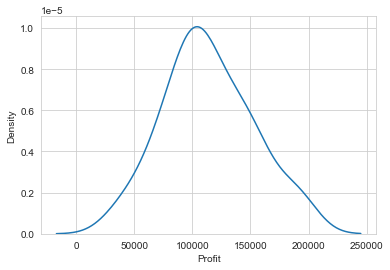

In [76]:
sns.set_style('whitegrid')
sns.distplot(a['Profit'],bins=20,hist=False)



In [32]:
a.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [33]:
x=a[['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida', 'State_New York']]

In [34]:
y=a[['Profit']]

In [39]:
x.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [42]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [40]:
from sklearn.preprocessing import StandardScaler
b=StandardScaler()
x_scaled=b.fit_transform(x)


In [38]:
pd.DataFrame(x_scaled).head()

,0,1,2,3,4
0,2.018325,0.552080,2.146120,-0.696311,1.371989
1,1.956704,1.069017,1.913596,-0.696311,-0.728869
2,1.751650,-0.724297,1.613709,1.436141,-0.728869
3,1.548545,-0.098597,1.407457,-0.696311,1.371989
4,1.497818,-1.072513,1.265442,1.436141,-0.728869


In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,train_size=0.75,random_state=120)

In [81]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)


LinearRegression()

In [82]:
lm.coef_

array([[33309.78465432,  -925.13912873,  3069.79735682,  -770.59916486,
         -685.33608699]])

In [83]:
lm.intercept_

array([114738.16753776])

In [84]:
y_pred=lm.predict(x_test)

In [86]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9496591567742231

In [87]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as sml


In [90]:
ols_model=sml.OLS(exog=x_train,endog=y_train).fit()

In [94]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.136
Model:                            OLS   Adj. R-squared (uncentered):             -0.004
Method:                 Least Squares   F-statistic:                             0.9741
Date:                Tue, 22 Nov 2022   Prob (F-statistic):                       0.449
Time:                        18:36:24   Log-Likelihood:                         -470.19
No. Observations:                  36   AIC:                                      950.4
Df Residuals:                      31   BIC:                                      958.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.616e+04   3.47e+04      1.042      0.305   -3.46e+04    1.07e+05
x2          9160.7663   2.57e+04      0.356      0.724   -4.33e+04    6.16e+04
x3          4502.2668   3.39e+04      0.133      0.895   -6.47e+04    7.37e+04
x4          1.419e+04   2.46e+04      0.578      0.567   -3.59e+04    6.43e+04
x5          1.167e+04   2.48e+04      0.470      0.642    -3.9e+04    6.23e+04
==============================================================================
Omnibus:                        0.746   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.736
Skew:                          -0.064   Prob(JB):                        0.692
Kurtosis:                       2.311   Cond. No.                         3.34
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV


In [99]:
Lasso_model=LassoCV(cv=10,normalize=True).fit(x_train,y_train)

C:\Users\Moin Kazi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Moin Kazi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [100]:
Lasso_model.score(x_test,y_test)

0.9413523085759292

In [103]:
Ridge_model=RidgeCV(cv=10,normalize=True).fit(x_train,y_train)

C:\Users\Moin Kazi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Moin Kazi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

fr

In [104]:
Ridge_model.score(x_test,y_test)

0.9148025530822813

In [ ]:
# R_Square - 94.96
# OLS method - -0.004
# Lasso - 94.13
# Ridge - 91.48